In [1]:
# import data
# TODO: clean data
# standardize data

# Original Community
# Fig1a. Community analysis genus level (bar chart)
# Fig1b. Community analysis phylum level (bar chart)

# Composition shift with change of carbon source (bar charts)
# Fig2a. Glucose
# Fig2b. Malate

# Effects of Perturbation

# General
# Fig3. PCoA (scatterplot)

# Effects on Network Generalist-Specialist
# Fig4a. Generalist-Specialist (network)
# Fig4b. Generalist-Specialist (scatterplot)

# Effects on state transitions, time series data
# Fig5. Topological Map

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import re

## Set Up Consistent Styling

*Key:*
- Shape indicates current carbon source
- Color indicates carbon series
- Marker Edge Width indicates day
- Marker Color indicates transfer series

In [3]:
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [4]:
map_carbon_shapes = {
    "C": "o",
    "G": "s",
    "M": "^",
}

def_marker_size = 10

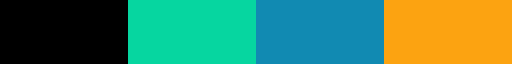

In [5]:
def_color = "black"
def_line_color = "#707070"

colors = [
    def_color, # original community 
    "#06D6A0", # cellulose
    "#118AB2", # glucose
    "#FCA311", # malate
]
map_carbon_colors = {
    "C": colors[1],
    "G": colors[2],
    "M": colors[3],
}
cmap = ListedColormap(colors, name="carbon")
cmap

In [6]:
map_days_widths = {
    "0": 0,
    "3": 1,
    "5": 2,
    "7": 3,
    "10": 4,
    "20": 5,
}

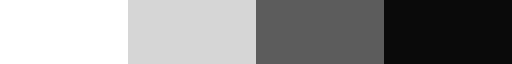

In [7]:
colors_transfers = [
    "#FFFFFF", # 0
    "#D6D6D6", # 1
    "#5C5C5C", # 2
    "#0A0A0A", # 3
]
map_transfers_colors = {
    "0": colors_transfers[0],
    "1": colors_transfers[1],
    "2": colors_transfers[2],
    "3": colors_transfers[3],
}

cmap_transfers = ListedColormap(colors_transfers, name="transfers")
cmap_transfers

## Process Data

We are working with three files:
* `<counts>.csv`: OTUs x sample
* `<annotations>.csv`: sample x variables
* `<taxonomy>.csv`: OTUs x taxonomy

OTUs and samples must be in the same order for all files

In [8]:
df_counts = pd.read_csv("data/FCF_master.csv", index_col=0).T
df_annotations = pd.read_csv("data/FCF_annotations.csv", index_col=0)

In [9]:
print("df_counts.shape", df_counts.shape)
df_counts.head()

df_counts.shape (87, 153)


,opitutus spp.,paludibacter propionicigenes,magnetospirillum sp.,rhodopseudomonas palustris,acetobacter spp.,bacteroides spp.,pleomorphomonas oryzae,afipia sp.,rhodoblastus acidophilus,spirochaeta spp.,...,bosea spp.,corynebacterium durum,rubrivivax gelatinosus,anaerococcus hydrogenalis,globicatella spp.,finegoldia magna,dietzia spp.,granulicatella elegans,actinomyces marimammalium,veillonella dispar
C0C,18304,16452,9817,9279,6578,6400,5409,4521,3913,1958,...,0,0,0,0,0,0,0,0,0,0
1C3A,19239,4060,13664,9191,902,1891,3647,2798,1163,257,...,0,0,0,0,0,0,0,0,0,0
1C3B,34155,6121,19194,13838,1395,3117,4828,3858,1357,221,...,0,0,1,0,0,0,0,0,0,0
1C5A,16237,1967,24640,8188,720,1520,2641,2308,2046,265,...,0,0,1,0,0,0,0,0,0,0
1C5B,23247,6002,16356,16142,1381,4462,6110,4695,3101,605,...,0,1,0,0,0,0,0,0,0,0


In [10]:
print("df_annotations.shape", df_annotations.shape)
df_annotations.head()

df_annotations.shape (87, 3)


,series,food,day
C0C,C0,cellulose,10
1C3A,1C,cellulose,3
1C3B,1C,cellulose,3
1C5A,1C,cellulose,5
1C5B,1C,cellulose,5


In [11]:
df_annotations.index

Index(['C0C', '1C3A', '1C3B', '1C5A', '1C5B', '1C7A', '1C7B', '1C10A', '1C10B',
       '1C20B', '1C20A', '2C3A', '2C3B', '2C5A', '2C5B', '2C10A', '2C10B',
       '1M3A', '1M3B', '1M3C', '1M5C', '1M5A', '1M5B', '1M7A', '1M7B', '1M7C',
       '1M10A', '1M10B', '1M10C', '2M3A', '2M3B', '2M3C', '2M5A', '2M5B',
       '2M7A', '2M7B', '2M7C', '2M10B', '2M10A', '2M10C', '3M3A', '3M3B',
       '3M3C', '3M5A', '3M5B', '3M5C', '3M7A', '3M7B', '3M7C', '3M10A',
       '3M10B', '3M10C', '1G3A', '1G3B', '1G3C', '1G5A', '1G5B', '1G5C',
       '1G7A', '1G7B', '1G7C', '1G10A', '1G10B', '1G10C', '2G3A', '2G3B',
       '2G3C', '2G5A', '2G5B', '2G5C', '2G7A', '2G7B', '2G7C', '2G10A',
       '2G10B', '2G10C', '3G3A', '3G3B', '3G3C', '3G5A', '3G5B', '3G5C',
       '3G7A', '3G7B', '3G7C', '3G10A', '3G10B'],
      dtype='object')

### Remove noisy data (OTUs that do not appear consistently)

* NOTE: 3G10C was removed because it might be a wrongly labeled result
* remove OTUs not in original sample
* remove OTUs with less than total threshold read counts across all samples
* TODO: remove OTUs that don't occur in enough samples

In [12]:
# remove OTUs not in original sample
threshold = 1
not_in_original = df_counts.columns[df_counts.loc['C0C'] < threshold]
# --- what OTUs are not in original sample?
print("Throw out OTUs that were not in origianl C0C community:", not_in_original, "length:", len(not_in_original))
df_not_in_original = df_counts[not_in_original]
df_not_in_original.sum(axis=0)

Throw out OTUs that were not in origianl C0C community: Index(['pseudomonas veronii', 'streptococcus salivarius',
       'stenotrophomonas spp.', 'zoogloea sp.', 'bordetella hinzii',
       'cytophaga spp.', 'rhizobium straminoryzae', 'methanosaeta sp.',
       'pontibacter korlensis', 'bacteroides fragilis',
       'sphingobium yanoikuyae', 'rhodothermus spp.', 'rhodovibrio sodomensis',
       'rhizobium sp.', 'enterobacter sp.', 'gemmatimonas spp.',
       'bacteroides caccae', 'eubacterium rectale', 'citrobacter sp.',
       'pseudomonas spp.', 'hydrogenophaga spp.', 'atopostipes sp.',
       'rhodovibrio spp.', 'ochrobactrum intermedium',
       'pseudochrobactrum kiredjianiae', 'steroidobacter spp.',
       'oligotropha carboxidovorans', 'salinibacter spp.',
       'pantoea agglomerans', 'chelatococcus spp.', 'streptococcus sanguinis',
       'afipia broomeae', 'prevotella sp.', 'thioalkalivibrio spp.',
       'methyloligella halotolerans', 'rhodopseudomonas oryzae',
       'porph

pseudomonas veronii          4119
streptococcus salivarius     2503
stenotrophomonas spp.         114
zoogloea sp.                   62
bordetella hinzii              29
                             ... 
finegoldia magna                4
dietzia spp.                    4
granulicatella elegans          4
actinomyces marimammalium       3
veillonella dispar              3
Length: 84, dtype: int64

In [13]:
df_counts = df_counts.drop(not_in_original, axis=1)
df_counts

,opitutus spp.,paludibacter propionicigenes,magnetospirillum sp.,rhodopseudomonas palustris,acetobacter spp.,bacteroides spp.,pleomorphomonas oryzae,afipia sp.,rhodoblastus acidophilus,spirochaeta spp.,...,escherichia vulneris,brevundimonas spp.,parabacteroides distasonis,nitrobacter hamburgensis,vitis vinifera,methylocystis heyerii,micrococcus luteus,delftia sp.,methylobacillus sp.,rhodobacter capsulatus
C0C,18304,16452,9817,9279,6578,6400,5409,4521,3913,1958,...,1,1,1,1,1,1,1,1,1,1
1C3A,19239,4060,13664,9191,902,1891,3647,2798,1163,257,...,0,0,0,0,0,0,0,0,0,0
1C3B,34155,6121,19194,13838,1395,3117,4828,3858,1357,221,...,2,0,0,0,1,0,0,0,0,0
1C5A,16237,1967,24640,8188,720,1520,2641,2308,2046,265,...,5,8,0,2,0,0,0,0,0,0
1C5B,23247,6002,16356,16142,1381,4462,6110,4695,3101,605,...,10,2,1,4,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3G7A,25593,319,3256,11598,10247,69747,28315,891,7625,15,...,5,0,3,0,0,1,0,0,0,0
3G7B,36316,109,3496,7593,9236,40432,30320,703,3922,15,...,7,0,0,0,0,0,0,0,0,0
3G7C,34948,136,4123,9157,12384,40225,28382,721,4594,16,...,2,5,1,0,0,2,0,0,0,0
3G10A,17610,250,18156,16920,8832,72267,27647,1603,9659,1,...,0,0,5,0,0,1,0,0,0,0


In [14]:
# remove OTUs with less than threshold read counts
threshold = 20
too_low_read_counts = df_counts.columns[df_counts.sum(axis=0) < threshold]
# --- what OTUs have too low read counts?
print("Throw out OTUs with low read counts:", too_low_read_counts, "length:", len(too_low_read_counts))
df_too_low_read_counts = df_counts[too_low_read_counts]
df_too_low_read_counts.sum(axis=0)

Throw out OTUs with low read counts: Index(['desulfovibrio desulfuricans', 'bradyrhizobium elkanii',
       'clostridium spp.', 'vitis vinifera', 'methylocystis heyerii',
       'micrococcus luteus', 'delftia sp.', 'methylobacillus sp.',
       'rhodobacter capsulatus'],
      dtype='object') length: 9


desulfovibrio desulfuricans     5
bradyrhizobium elkanii          7
clostridium spp.                6
vitis vinifera                 19
methylocystis heyerii          14
micrococcus luteus              5
delftia sp.                     4
methylobacillus sp.             3
rhodobacter capsulatus          3
dtype: int64

In [15]:
df_counts = df_counts.drop(too_low_read_counts, axis=1)
df_counts

,opitutus spp.,paludibacter propionicigenes,magnetospirillum sp.,rhodopseudomonas palustris,acetobacter spp.,bacteroides spp.,pleomorphomonas oryzae,afipia sp.,rhodoblastus acidophilus,spirochaeta spp.,...,ochrobactrum anthropi,nitrospirillum azospirillum amazonense,acinetobacter junii,propionibacterium acnes,brevundimonas sp.,rhizobium petrolearium,escherichia vulneris,brevundimonas spp.,parabacteroides distasonis,nitrobacter hamburgensis
C0C,18304,16452,9817,9279,6578,6400,5409,4521,3913,1958,...,1,1,1,1,1,1,1,1,1,1
1C3A,19239,4060,13664,9191,902,1891,3647,2798,1163,257,...,4,0,0,3,1,0,0,0,0,0
1C3B,34155,6121,19194,13838,1395,3117,4828,3858,1357,221,...,5,2,4,1,0,1,2,0,0,0
1C5A,16237,1967,24640,8188,720,1520,2641,2308,2046,265,...,24,70,0,1,24,0,5,8,0,2
1C5B,23247,6002,16356,16142,1381,4462,6110,4695,3101,605,...,20,53,1,1,16,1,10,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3G7A,25593,319,3256,11598,10247,69747,28315,891,7625,15,...,22,7,0,2,5,8,5,0,3,0
3G7B,36316,109,3496,7593,9236,40432,30320,703,3922,15,...,15,4,0,0,0,11,7,0,0,0
3G7C,34948,136,4123,9157,12384,40225,28382,721,4594,16,...,28,12,0,1,4,4,2,5,1,0
3G10A,17610,250,18156,16920,8832,72267,27647,1603,9659,1,...,4,1,16,0,0,1,0,0,5,0


### Standardize Data

Transform absolute counts to relative abundances.
Relative counts for a sample should add up to 1.
Do this by dividing counts in each sample by total counts in sample.

In [16]:
df_counts_rel = df_counts.div(df_counts.sum(axis=1), axis=0)
df_counts_rel.head()

,opitutus spp.,paludibacter propionicigenes,magnetospirillum sp.,rhodopseudomonas palustris,acetobacter spp.,bacteroides spp.,pleomorphomonas oryzae,afipia sp.,rhodoblastus acidophilus,spirochaeta spp.,...,ochrobactrum anthropi,nitrospirillum azospirillum amazonense,acinetobacter junii,propionibacterium acnes,brevundimonas sp.,rhizobium petrolearium,escherichia vulneris,brevundimonas spp.,parabacteroides distasonis,nitrobacter hamburgensis
C0C,0.207712,0.186696,0.111402,0.105297,0.074647,0.072627,0.061381,0.051304,0.044404,0.022219,...,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011
1C3A,0.267023,0.056350,0.189646,0.127564,0.012519,0.026246,0.050618,0.038834,0.016142,0.003567,...,0.000056,0.000000,0.000000,0.000042,0.000014,0.000000,0.000000,0.000000,0.000000,0.000000
1C3B,0.290520,0.052065,0.163263,0.117705,0.011866,0.026513,0.041067,0.032816,0.011543,0.001880,...,0.000043,0.000017,0.000034,0.000009,0.000000,0.000009,0.000017,0.000000,0.000000,0.000000
1C5A,0.194220,0.023528,0.294733,0.097941,0.008612,0.018182,0.031591,0.027607,0.024473,0.003170,...,0.000287,0.000837,0.000000,0.000012,0.000287,0.000000,0.000060,0.000096,0.000000,0.000024
1C5B,0.187924,0.048519,0.132219,0.130489,0.011164,0.036070,0.049392,0.037954,0.025068,0.004891,...,0.000162,0.000428,0.000008,0.000008,0.000129,0.000008,0.000081,0.000016,0.000008,0.000032


In [17]:
# check that samples sum to 1
df_counts_rel.sum(axis=1)

C0C      1.0
1C3A     1.0
1C3B     1.0
1C5A     1.0
1C5B     1.0
        ... 
3G7A     1.0
3G7B     1.0
3G7C     1.0
3G10A    1.0
3G10B    1.0
Length: 87, dtype: float64

## Split Labels

In [18]:
from collections import Counter

In [19]:
original = df_counts_rel.loc['C0C']
labels = original.index
family_labels = [i.split()[0] for i in labels]
species_labels = [i.split()[1] for i in labels]
family_count = Counter(family_labels)

Text(0.5, 0, 'OTU Count')

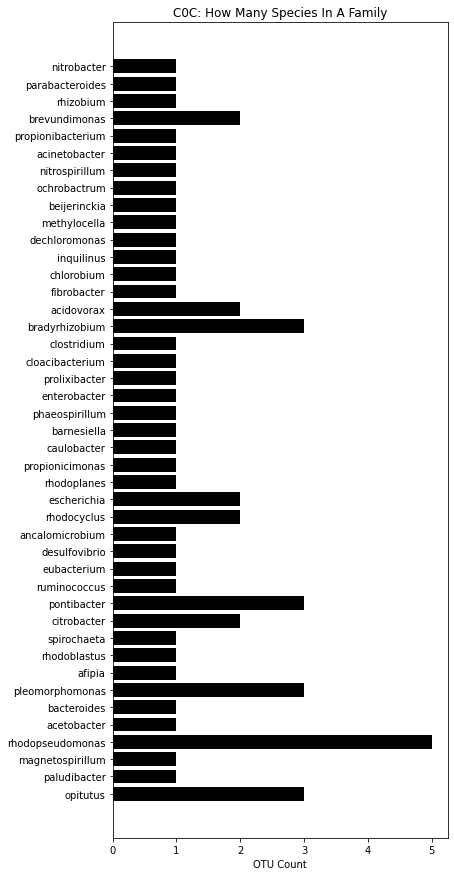

In [20]:
# just get a sense of how many species are in a family
f, ax = plt.subplots(figsize=(6, 15))
ax.barh(list(family_count.keys()), list(family_count.values()), color=def_color)
ax.set_title("C0C: How Many Species In A Family")
ax.set_xlabel("OTU Count")

## Inspect Data

Make bar charts to:
* Observe original community
* Observe composition shift as effect of carbon perturbation
* Make sure no samples look weird

Log Scale is favorable because small fluctuations in large numbers do not matter as much

Text(0.5, 0, 'Absolute Counts')

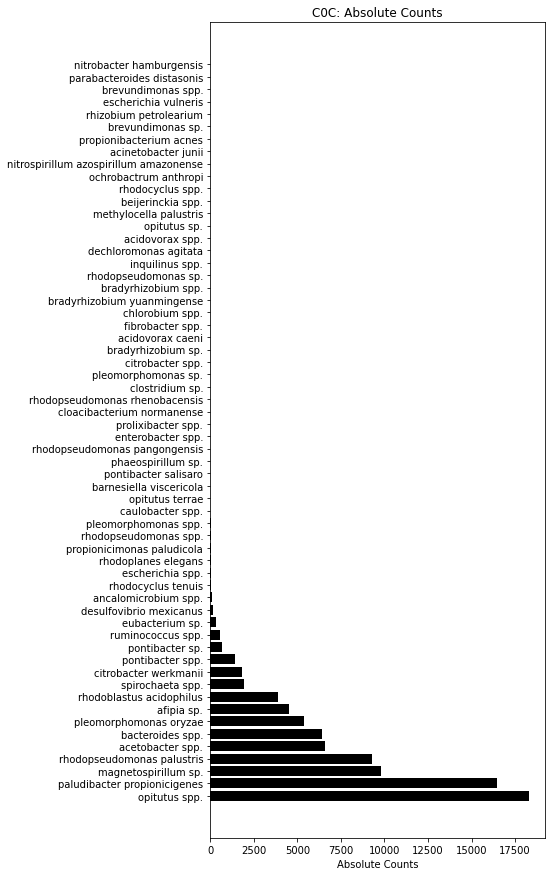

In [21]:
data = df_counts.loc['C0C']
f, ax = plt.subplots(figsize=(6, 15))
ax.barh(data.index, data.values, color=def_color)
ax.set_title("C0C: Absolute Counts")
ax.set_xlabel("Absolute Counts")

Text(0.5, 0, 'Log Relative Counts')

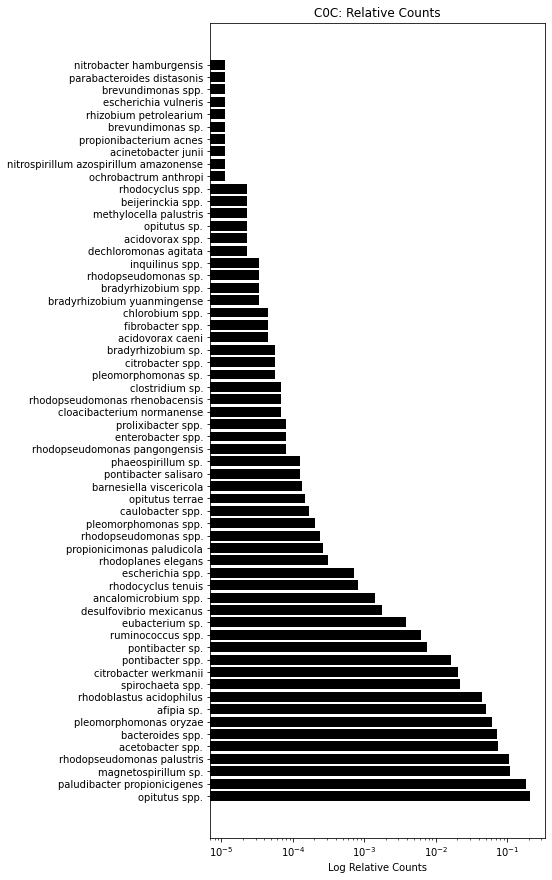

In [22]:
data = df_counts_rel.loc['C0C']
f, ax = plt.subplots(figsize=(6, 15))
ax.barh(data.index, data.values, log=True, color=def_color)
ax.set_title("C0C: Relative Counts")
ax.set_xlabel("Log Relative Counts")

Text(0.5, 0, 'Relative Counts')

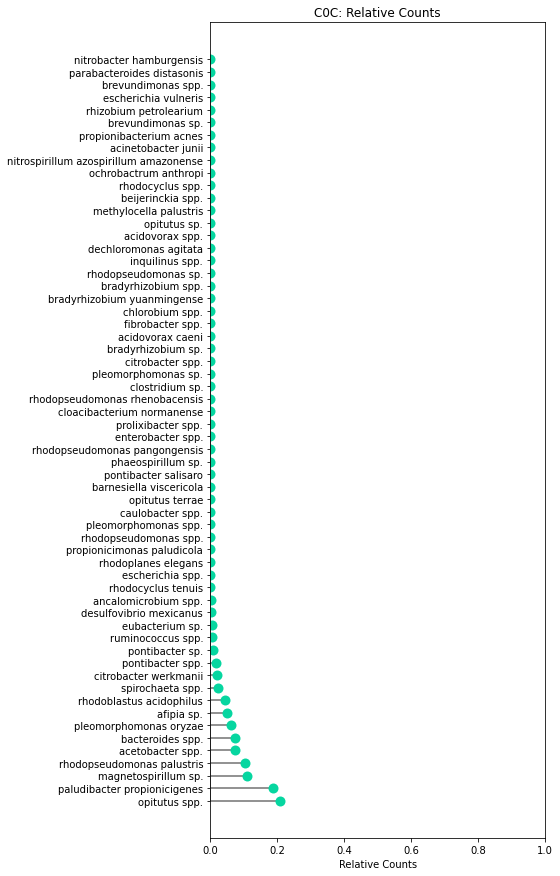

In [23]:
# inspect cellulose communities
searchstring = "C0C"
f, ax = plt.subplots(figsize=(6, 15))
for sample_label in df_counts_rel.index:
    if sample_label.startswith(searchstring):
        data = df_counts_rel.loc[sample_label]
        # set plot variables
        carbon_style = map_carbon_colors["C"]
        series_style = map_carbon_shapes["C"]
        day_style = map_days_widths['0']
        transfer_style = map_transfers_colors['0']        
        # set plot styling
        (markerline, stemlines, baseline) = ax.stem(data.index, data.values, orientation="horizontal")
        plt.setp(markerline, markersize=def_marker_size, color=carbon_style, marker=series_style, markeredgecolor=transfer_style, markeredgewidth=day_style)
        plt.setp(stemlines, "color", def_line_color)
        plt.setp(baseline, "color", def_line_color)
        plt.xlim([0, 1])
ax.set_title("{}: Relative Counts".format(searchstring))
ax.set_xlabel("Relative Counts")

Text(0.5, 0, 'Relative Counts')

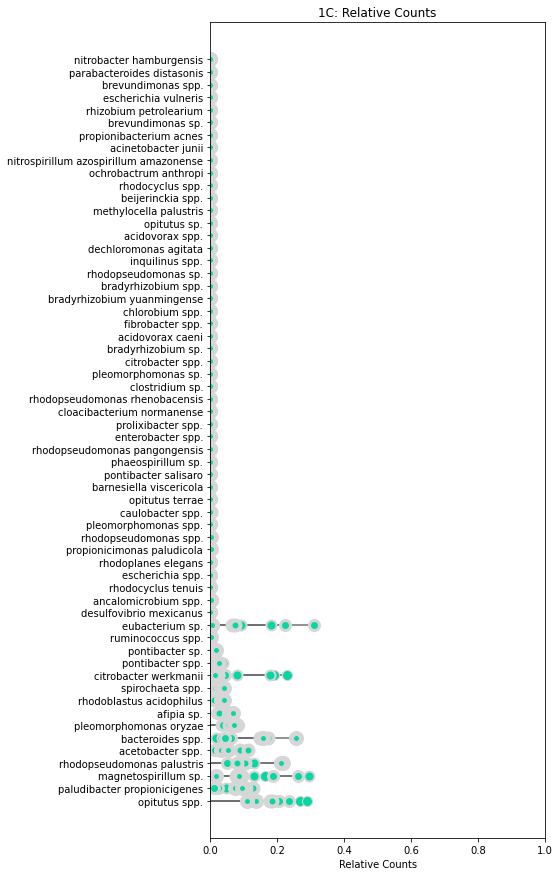

In [24]:
searchstring = "1C"
f, ax = plt.subplots(figsize=(6, 15))
for sample_label in df_counts_rel.index:
    if sample_label.startswith(searchstring):
        data = df_counts_rel.loc[sample_label]
        # set plot variables
        series_style = map_carbon_colors["C"]
        carbon_style = map_carbon_shapes["C"] 
        day_style = map_days_widths[str(re.findall(r'\d+', sample_label)[1])]
        transfer_style = map_transfers_colors['1']        
        # set plot styling
        (markerline, stemlines, baseline) = ax.stem(data.index, data.values, orientation="horizontal")
        plt.setp(markerline, markersize=def_marker_size, color=series_style, marker=carbon_style, markeredgecolor=transfer_style, markeredgewidth=day_style)
        plt.setp(stemlines, "color", def_line_color)
        plt.setp(baseline, "color", def_line_color)
        plt.xlim([0, 1])
ax.set_title("{}: Relative Counts".format(searchstring))
ax.set_xlabel("Relative Counts")

Text(0.5, 0, 'Relative Counts')

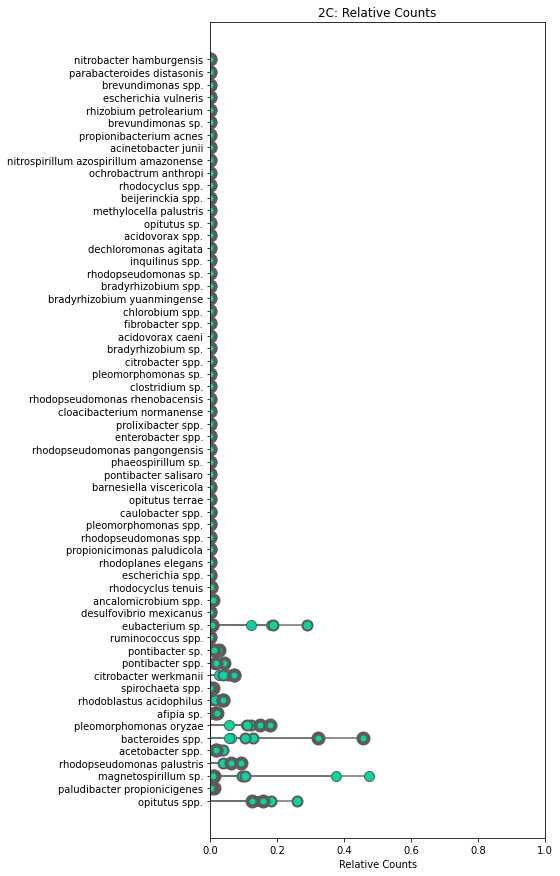

In [25]:
searchstring = "2C"
f, ax = plt.subplots(figsize=(6, 15))
for sample_label in df_counts_rel.index:
    if sample_label.startswith(searchstring):
        data = df_counts_rel.loc[sample_label]
        # set plot variables
        series_style = map_carbon_colors["C"]
        carbon_style = map_carbon_shapes["C"] 
        day_style = map_days_widths[str(re.findall(r'\d+', sample_label)[1])]
        transfer_style = map_transfers_colors['2']        
        # set plot styling
        (markerline, stemlines, baseline) = ax.stem(data.index, data.values, orientation="horizontal")
        plt.setp(markerline, markersize=def_marker_size, color=series_style, marker=carbon_style, markeredgecolor=transfer_style, markeredgewidth=day_style)
        plt.setp(stemlines, "color", def_line_color)
        plt.setp(baseline, "color", def_line_color)
        plt.xlim([0, 1])
ax.set_title("{}: Relative Counts".format(searchstring))
ax.set_xlabel("Relative Counts")

Text(0.5, 0, 'Relative Counts')

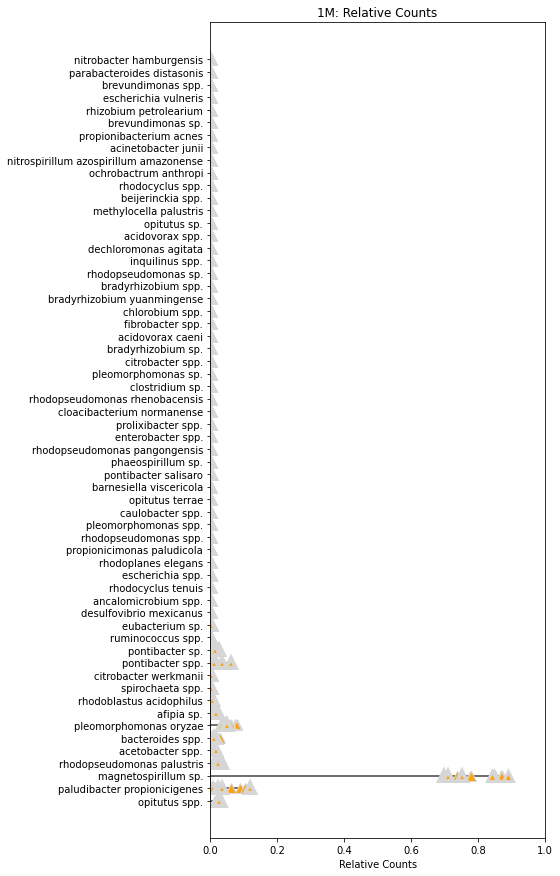

In [26]:
searchstring = "1M"
f, ax = plt.subplots(figsize=(6, 15))
for sample_label in df_counts_rel.index:
    if sample_label.startswith(searchstring):
        data = df_counts_rel.loc[sample_label]
        # set plot variables
        series_style = map_carbon_colors["M"]
        carbon_style = map_carbon_shapes["M"] 
        day_style = map_days_widths[str(re.findall(r'\d+', sample_label)[1])]
        transfer_style = map_transfers_colors['1']        
        # set plot styling
        (markerline, stemlines, baseline) = ax.stem(data.index, data.values, orientation="horizontal")
        plt.setp(markerline, markersize=def_marker_size, color=series_style, marker=carbon_style, markeredgecolor=transfer_style, markeredgewidth=day_style)
        plt.setp(stemlines, "color", def_line_color)
        plt.setp(baseline, "color", def_line_color)
        plt.xlim([0, 1])
ax.set_title("{}: Relative Counts".format(searchstring))
ax.set_xlabel("Relative Counts")

Text(0.5, 0, 'Relative Counts')

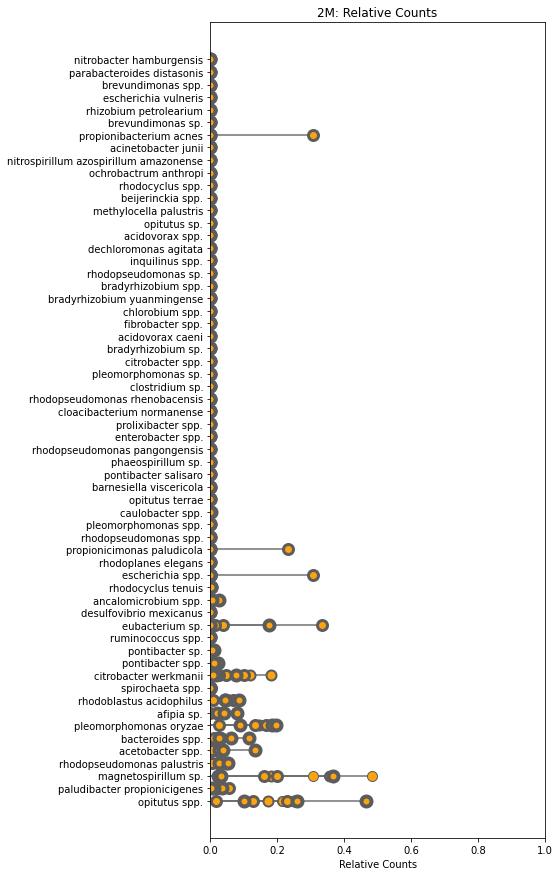

In [27]:
searchstring = "2M"
f, ax = plt.subplots(figsize=(6, 15))
for sample_label in df_counts_rel.index:
    if sample_label.startswith(searchstring):
        data = df_counts_rel.loc[sample_label]
        # set plot variables
        series_style = map_carbon_colors["M"]
        carbon_style = map_carbon_shapes["C"] 
        day_style = map_days_widths[str(re.findall(r'\d+', sample_label)[1])]
        transfer_style = map_transfers_colors['2']        
        # set plot styling
        (markerline, stemlines, baseline) = ax.stem(data.index, data.values, orientation="horizontal")
        plt.setp(markerline, markersize=def_marker_size, color=series_style, marker=carbon_style, markeredgecolor=transfer_style, markeredgewidth=day_style)
        plt.setp(stemlines, "color", def_line_color)
        plt.setp(baseline, "color", def_line_color)
        plt.xlim([0, 1])
ax.set_title("{}: Relative Counts".format(searchstring))
ax.set_xlabel("Relative Counts")

Text(0.5, 0, 'Relative Counts')

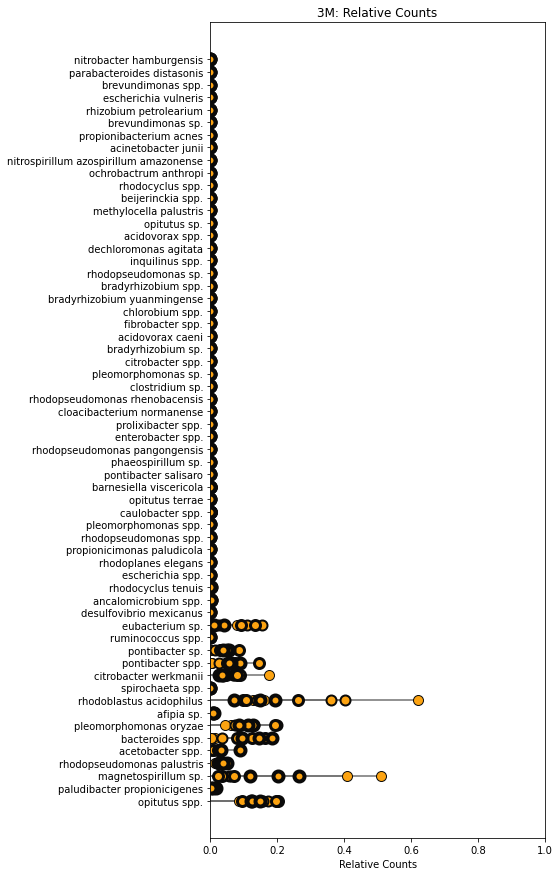

In [28]:
searchstring = "3M"
f, ax = plt.subplots(figsize=(6, 15))
for sample_label in df_counts_rel.index:
    if sample_label.startswith(searchstring):
        data = df_counts_rel.loc[sample_label]
        # set plot variables
        series_style = map_carbon_colors["M"]
        carbon_style = map_carbon_shapes["C"] 
        day_style = map_days_widths[str(re.findall(r'\d+', sample_label)[1])]
        transfer_style = map_transfers_colors['3']        
        # set plot styling
        (markerline, stemlines, baseline) = ax.stem(data.index, data.values, orientation="horizontal")
        plt.setp(markerline, markersize=def_marker_size, color=series_style, marker=carbon_style, markeredgecolor=transfer_style, markeredgewidth=day_style)
        plt.setp(stemlines, "color", def_line_color)
        plt.setp(baseline, "color", def_line_color)
        plt.xlim([0, 1])
ax.set_title("{}: Relative Counts".format(searchstring))
ax.set_xlabel("Relative Counts")

Text(0.5, 0, 'Relative Counts')

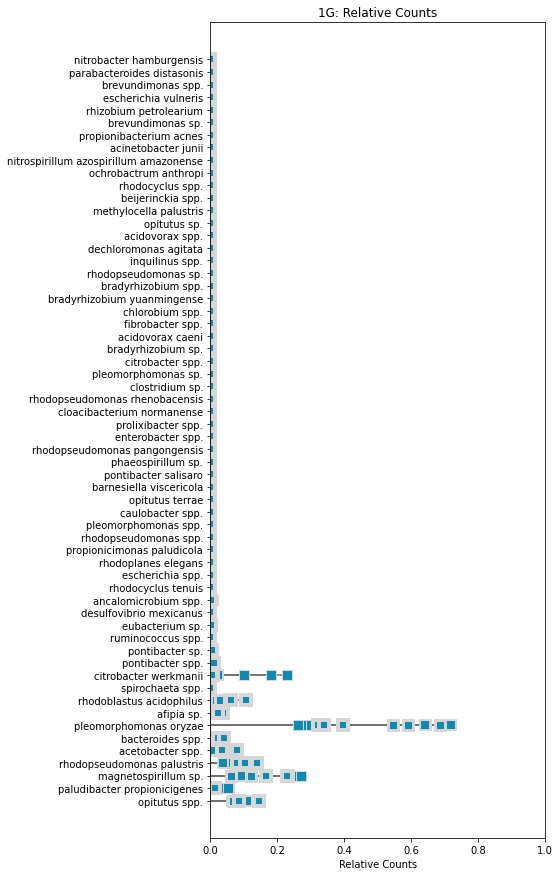

In [29]:
searchstring = "1G"
f, ax = plt.subplots(figsize=(6, 15))
for sample_label in df_counts_rel.index:
    if sample_label.startswith(searchstring):
        data = df_counts_rel.loc[sample_label]
        # set plot variables
        series_style = map_carbon_colors["G"]
        carbon_style = map_carbon_shapes["G"] 
        day_style = map_days_widths[str(re.findall(r'\d+', sample_label)[1])]
        transfer_style = map_transfers_colors['1']        
        # set plot styling
        (markerline, stemlines, baseline) = ax.stem(data.index, data.values, orientation="horizontal")
        plt.setp(markerline, markersize=def_marker_size, color=series_style, marker=carbon_style, markeredgecolor=transfer_style, markeredgewidth=day_style)
        plt.setp(stemlines, "color", def_line_color)
        plt.setp(baseline, "color", def_line_color)
        plt.xlim([0, 1])
ax.set_title("{}: Relative Counts".format(searchstring))
ax.set_xlabel("Relative Counts")

Text(0.5, 0, 'Relative Counts')

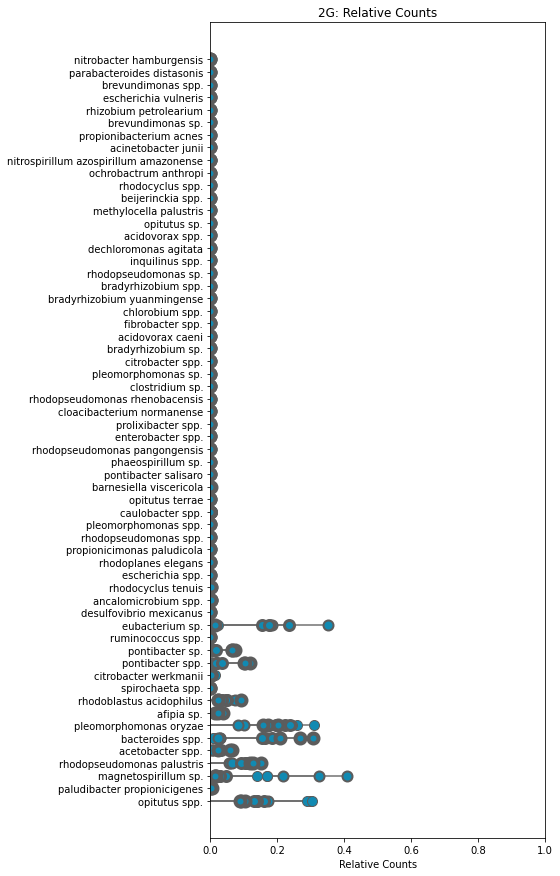

In [30]:
searchstring = "2G"
f, ax = plt.subplots(figsize=(6, 15))
for sample_label in df_counts_rel.index:
    if sample_label.startswith(searchstring):
        data = df_counts_rel.loc[sample_label]
        # set plot variables
        series_style = map_carbon_colors["G"]
        carbon_style = map_carbon_shapes["C"] 
        day_style = map_days_widths[str(re.findall(r'\d+', sample_label)[1])]
        transfer_style = map_transfers_colors['2']        
        # set plot styling
        (markerline, stemlines, baseline) = ax.stem(data.index, data.values, orientation="horizontal")
        plt.setp(markerline, markersize=def_marker_size, color=series_style, marker=carbon_style, markeredgecolor=transfer_style, markeredgewidth=day_style)
        plt.setp(stemlines, "color", def_line_color)
        plt.setp(baseline, "color", def_line_color)
        plt.xlim([0, 1])
ax.set_title("{}: Relative Counts".format(searchstring))
ax.set_xlabel("Relative Counts")

Text(0.5, 0, 'Relative Counts')

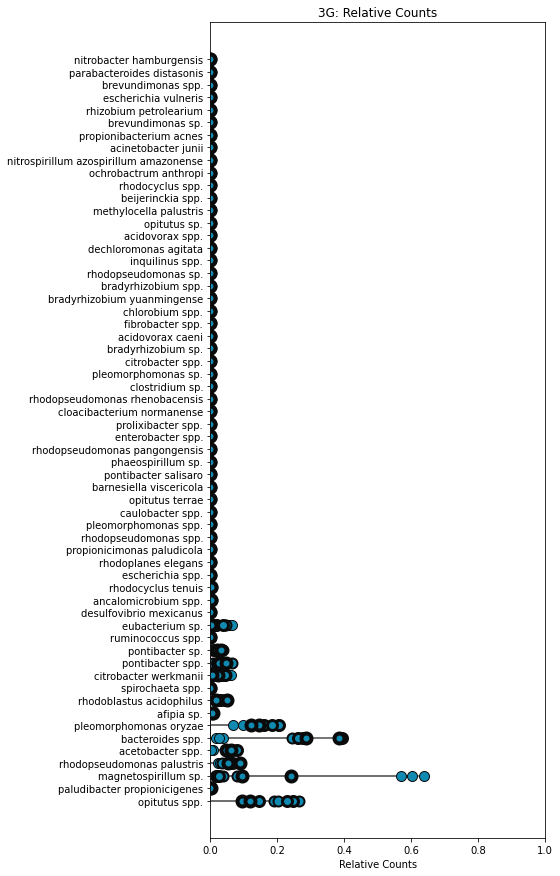

In [31]:
searchstring = "3G"
f, ax = plt.subplots(figsize=(6, 15))
for sample_label in df_counts_rel.index:
    if sample_label.startswith(searchstring):
        data = df_counts_rel.loc[sample_label]
        # set plot variables
        series_style = map_carbon_colors["G"]
        carbon_style = map_carbon_shapes["C"] 
        day_style = map_days_widths[str(re.findall(r'\d+', sample_label)[1])]
        transfer_style = map_transfers_colors['3']        
        # set plot styling
        (markerline, stemlines, baseline) = ax.stem(data.index, data.values, orientation="horizontal")
        plt.setp(markerline, markersize=def_marker_size, color=series_style, marker=carbon_style, markeredgecolor=transfer_style, markeredgewidth=day_style)
        plt.setp(stemlines, "color", def_line_color)
        plt.setp(baseline, "color", def_line_color)
        plt.xlim([0, 1])
ax.set_title("{}: Relative Counts".format(searchstring))
ax.set_xlabel("Relative Counts")